# Import and installas needed

In [133]:
!pip install imageio==2.34.0
!pip install cvat_sdk
!pip install "cvat-sdk[pytorch]"
!pip install albumentations
# !pip install torch==1.13.1+cu117 torchvision==0.14.1+cu117 torchaudio==0.13.1 --index-url https://download.pytorch.org/whl/cu117

In [134]:
import cvat_sdk

In [135]:
import PIL
print('pillow version: ', PIL.__version__)


pillow version:  10.4.0


In [136]:
from torchvision import transforms
def get_red_channel(image: PIL.Image.Image) -> PIL.Image.Image:
    return image[:,:,0] #return just the red channel

In [137]:
import albumentations as A
import torch
#from torchvision.transforms import transforms

# train : bool

# only relevant is train = true:
#   rotation : [min,max] upper lower limits of rotation
def get_transform_large_image(train, rotation = [-7,7], rotation_prob=0.5):

  transforms = []

  # the onlnie system only uses the center of the image.


  if train:
    pass
    #transforms.append( A.augmentations.geometric.rotate.SafeRotate (limit=rotation, interpolation=1, border_mode=4, value=None, mask_value=None, always_apply=False, p=rotation_prob) )
    # mayube use center crop?
    #transforms.append(A.HorizontalFlip(p=0.5))
    #transforms.append(A.VerticalFlip(p=0.5))


    # this one is more dstructive, we will start without using it.
    # transforms.append(A.OneOf([
    #     A.ElasticTransform(p=0.5, alpha=120, sigma=120 * 0.05, alpha_affine=120 * 0.03),
    #     A.GridDistortion(p=0.5),
    #     A.OpticalDistortion(distort_limit=1, shift_limit=0.5, p=1),
    # ], p=0.8)])
    #transforms.append(A.augmentations.crops.transforms.Crop(0,40,2464,480))
    #transforms.append(A.augmentations.crops.RandomCrop(height=460, width=460, always_apply=True, p=1.0))
    #transforms.append(A.augmentations.geometric.rotate.SafeRotate (limit=rotation, interpolation=1, border_mode=4, value=None, mask_value=None, always_apply=False, p=rotation_prob) )
    #transforms.append(A.augmentations.elastic_transforms.ElasticTransform(p=0.5, alpha=120, sigma=120 * 0.05, alpha_affine=120 * 0.03))
  # else:

  transforms.append(A.augmentations.crops.transforms.Crop(0,40,2464,480))

  # transforms.append(v2.Lambda(get_red_channel))

  transform = A.Compose(
    transforms,
    bbox_params=A.BboxParams(format="pascal_voc", label_fields=['class_labels']),
  )

  return transform


tf_test = get_transform_large_image(train=True)

In [138]:
# import torchvision
# from torchvision.models.detection.faster_rcnn import FastRCNNPredictor
# from torchvision.models.detection.mask_rcnn import MaskRCNNPredictor


# def get_instance_segmentation_model(num_classes):
#     # load an instance segmentation model pre-trained on COCO
#     model = torchvision.models.detection.maskrcnn_resnet50_fpn(
#         pretrained=True,
#         box_detections_per_image=1000,
#         box_batch_size_per_image=5120,
#         rpn_pre_nms_top_n_train=20000,
#         rpn_pre_nms_top_n_test=10000,
#         rpn_post_nms_top_n_train=20000,
#         rpn_post_nms_top_n_test=10000,
#         rpn_nms_thresh=0.7,
#         rpn_fg_iou_thresh=0.7,
#         rpn_bg_iou_thresh=0.3,
#         rpn_batch_size_per_image=2560,
#         min_size=125,
#         max_size=616,
#     )

#     # get the number of input features for the classifier
#     in_features = model.roi_heads.box_predictor.cls_score.in_features
#     # replace the pre-trained head with a new one
#     model.roi_heads.box_predictor = FastRCNNPredictor(in_features, num_classes)

#     # now get the number of input features for the mask classifier
#     in_features_mask = model.roi_heads.mask_predictor.conv5_mask.in_channels
#     hidden_layer = 256
#     # and replace the mask predictor with a new one
#     model.roi_heads.mask_predictor = MaskRCNNPredictor(in_features_mask,
#                                                        hidden_layer,
#                                                        num_classes)

#     return model

In [139]:
cvat_dataset = None

Createa a dataset by pulling data from cvat

In [140]:
from cvat_sdk import make_client
from cvat_sdk.pytorch import TaskVisionDataset, ExtractSingleLabelIndex
import getpass

# get the password for CVAT
# password = getpass.getpass()

tasks = [
    936659,
    936824,
    936913,
    937046,
]

cvat_datasets = {}

with make_client(host="app.cvat.ai", credentials=('whavener', 'LabelDoo1')) as client:
  for t in tasks:
    cvat_datasets[t] = TaskVisionDataset(client, task_id=t,
        # use transforms that fit our neural network
        # transform=torchvision.models.ResNet34_Weights.IMAGENET1K_V1.transforms(),
        # transform=get_transform(train=True )
        )


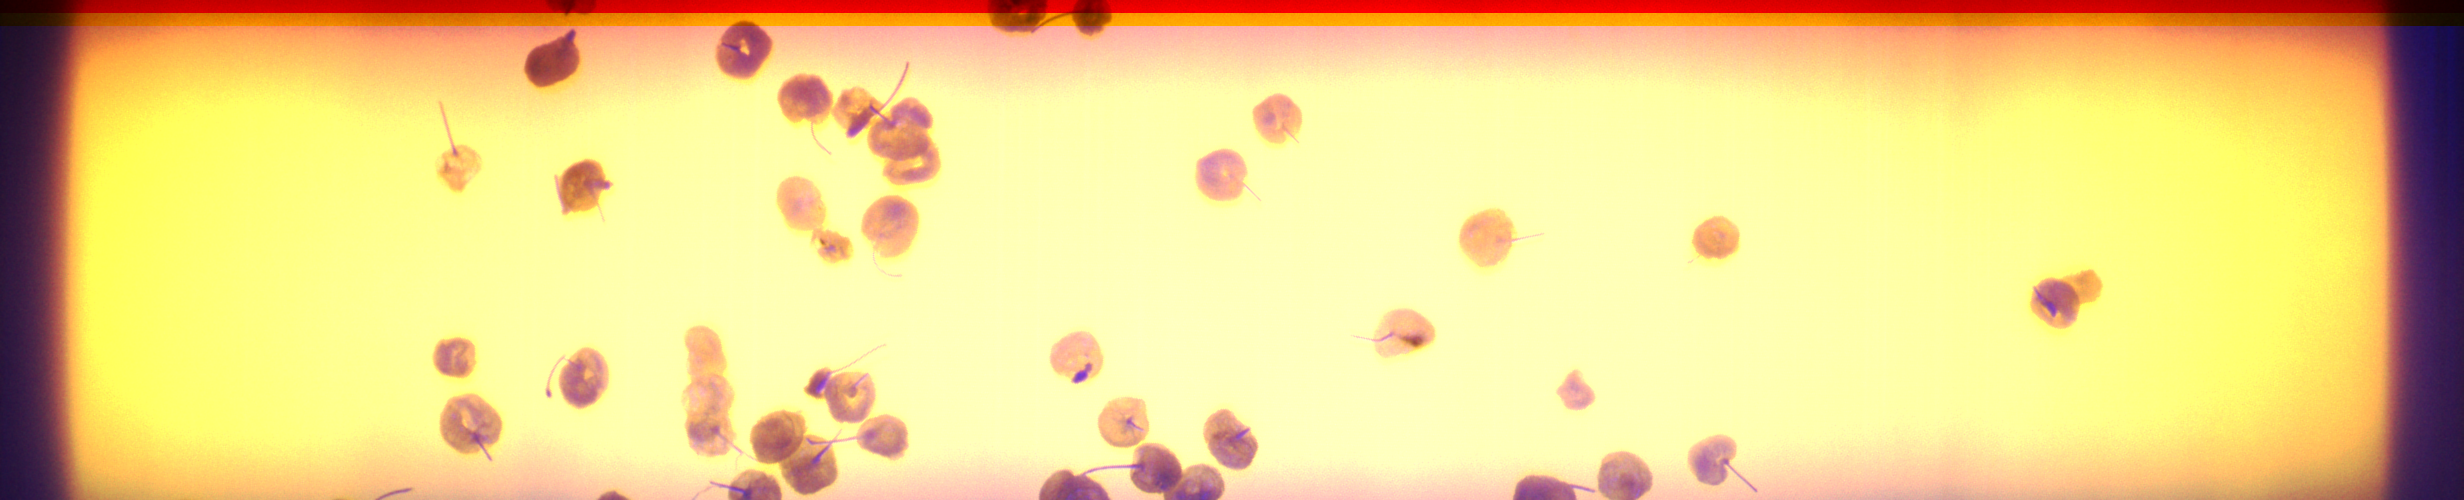

In [141]:
im, target = cvat_datasets[tasks[0]][5]
im

In [142]:
target

Target(annotations=FrameAnnotations(tags=[], shapes=[{'attributes': [],
 'elements': [],
 'frame': 5,
 'group': 0,
 'id': 589855853,
 'label_id': 3456679,
 'occluded': False,
 'outside': False,
 'points': [471.6719362378135,
            429.7333751499609,
            493.96313681602624,
            462.21977599262755],
 'rotation': 0.0,
 'source': 'manual',
 'type': 'rectangle',
 'z_order': 0}, {'attributes': [],
 'elements': [],
 'frame': 5,
 'group': 0,
 'id': 589855845,
 'label_id': 3456679,
 'occluded': False,
 'outside': False,
 'points': [438.45187115967565,
            100.37212810814526,
            461.05411109626584,
            157.8108479470029],
 'rotation': 0.0,
 'source': 'manual',
 'type': 'rectangle',
 'z_order': 0}, {'attributes': [],
 'elements': [],
 'frame': 5,
 'group': 0,
 'id': 589855846,
 'label_id': 3456679,
 'occluded': False,
 'outside': False,
 'points': [552.4998708397179,
            173.9849279016271,
            568.6739507943421,
            211.724447

In [143]:
type(cvat_dataset)


NoneType

In [144]:
dummy_points = [26.0,
          7.0,
          45.0,
          16.0,
          42.0,
          17.0,
          40.0,
          24.0,
          32.0,
          30.0,
          28.0,
          33.0,
          25.0,
          35.0,
          23.0,
          38.0,
          21.0,
          40.0,
          18.0,
          45.0,
          14.0,
          46.0,
          11.0,
          49.0,
          9.0,
          51.0,
          7.0,
          52.0,
          6.0,
          53.0,
          6.0,
          53.0,
          6.0,
          53.0,
          5.0,
          54.0,
          4.0,
          55.0,
          4.0,
          55.0,
          4.0,
          55.0,
          3.0,
          56.0,
          2.0,
          57.0,
          2.0,
          57.0,
          2.0,
          57.0,
          2.0,
          58.0,
          1.0,
          118.0,
          1.0,
          58.0,
          2.0,
          57.0,
          2.0,
          57.0,
          2.0,
          57.0,
          3.0,
          55.0,
          5.0,
          53.0,
          6.0,
          52.0,
          8.0,
          50.0,
          9.0,
          50.0,
          10.0,
          48.0,
          12.0,
          47.0,
          12.0,
          47.0,
          13.0,
          45.0,
          14.0,
          45.0,
          15.0,
          42.0,
          18.0,
          41.0,
          18.0,
          41.0,
          19.0,
          39.0,
          21.0,
          38.0,
          22.0,
          36.0,
          25.0,
          34.0,
          25.0,
          33.0,
          27.0,
          31.0,
          29.0,
          30.0,
          30.0,
          27.0,
          34.0,
          24.0,
          37.0,
          21.0,
          39.0,
          18.0,
          51.0,
          7.0,
          19.0,
          1012.0,
          590.0,
          1070.0,
          646.0]

In [145]:
import numpy as np

def rle2MaskCvat(rle: list[int], width: int, height:int)->np.ndarray:

    rle_int = [int(i) for i in rle]

    x1 = rle_int[-4]
    x2 = rle_int[-2]
    y1 = rle_int[-3]
    y2 = rle_int[-1]

    mask_width = x2 -x1 + 1
    mask_height = y2 - y1 + 1

    rle_mask = rle_int[:-5]

    decoded = [0] * (mask_width * mask_height) # create bitmap container
    decoded_idx = 0
    value = 0



    for v in rle_mask:
        decoded[decoded_idx:decoded_idx+v] = [value] * v
        decoded_idx += v
        value = abs(value - 1)

    decoded = np.array(decoded, dtype=np.uint8)
    decoded = decoded.reshape((mask_height, mask_width)) # reshape to image size

    whole_mask = np.zeros(( height, width))
    #print(height, width)
    #print(mask_height, mask_width)
    whole_mask[y1:y2+1,x1:x2+1] =  decoded

    #whole_mask = np.expand_dims(whole_mask, axis=2)

    # mask = {
    #     'data' : decoded,
    #     'mask_height' : mask_height,
    #     'mask_width' : mask_width,
    #     'x1' : x1,
    #     'x2' : x2+1,
    #     'y1' : y1,
    #     'y2' : y2+1,
    #     'image_height' : height,
    #     'image_width' : width,
    # }

    return whole_mask

# test the function

def get_big_mask (mask):
    whole_mask = np.zeros(( mask['image_height'], mask['image_width']))
    #print(height, width)
    #print(mask_height, mask_width)
    whole_mask[mask['y1']:mask['y2'],mask['x1']:mask['x2']] =  mask['data']

    return whole_mask


mask_data = rle2MaskCvat(dummy_points, 2464, 876)

# mask = get_big_mask(mask_data)


In [146]:
# resnet50 expects [x1, y1, x2, y2] format

def rle2Bbox(rle: list[int])->np.ndarray:

    rle_int = [int(i) for i in rle]

    x1 = rle_int[-4]
    x2 = rle_int[-2]
    y1 = rle_int[-3]
    y2 = rle_int[-1]

    return np.array([x1, y1, x2, y2])


bbox = rle2Bbox(dummy_points)
bbox


array([1012,  590, 1070,  646])

In [147]:
import numpy as np

def rle2Area(rle: list[int])-> int:

    rle_int = [int(i) for i in rle]

    x1 = rle_int[-4]
    x2 = rle_int[-2]
    y1 = rle_int[-3]
    y2 = rle_int[-1]

    mask_width = x2 -x1 + 1
    mask_height = y2 - y1 + 1

    rle_mask = rle_int[:-5]

    # decoded = [0] * (mask_width * mask_height) # create bitmap container
    # decoded_idx = 0
    value = 0


    area = 0
    for v in rle_mask:
        # decoded[decoded_idx:decoded_idx+v] = [value] * v
        # decoded_idx += v
        if (value == 1):
          area = area + value
        value = abs(value - 1)

    return area

# test the function



vals = rle2Area(dummy_points)
print(vals)

56


In [148]:
def get_valid(bboxes):
  index = 0
  valid = []
  for bbox in bboxes:
    # if (bbox[1] <= 480 and bbox[3] >= 40): # and bbox[0] <= 480 and bbox[2] >= 20 :
    #   valid.append(index)
    valid.append(index)
    index = index + 1
  return valid


In [149]:

DEFAULT_IMAGE_SHAPE = (500,2464)

# ref.: https://www.kaggle.com/stainsby/fast-tested-rle
def mask2rle(img):
    """
    img: numpy array, 1 - mask, 0 - background
    Returns run length as string formatted
    """
    pixels = img.flatten()
    pixels = np.concatenate([[0], pixels, [0]])
    runs = np.where(pixels[1:] != pixels[:-1])[0] + 1
    runs[1::2] -= runs[::2]
    return ' '.join(str(x) for x in runs)


def rle2mask(mask_rle: str, label=1, shape=DEFAULT_IMAGE_SHAPE):
    """
    mask_rle: run-length as string formatted (start length)
    shape: (height,width) of array to return
    Returns numpy array, 1 - mask, 0 - background

    """
    s = mask_rle.split()
    starts, lengths = [np.asarray(x, dtype=int) for x in (s[0:][::2], s[1:][::2])]
    starts -= 1
    ends = starts + lengths
    img = np.zeros(shape[0] * shape[1], dtype=np.uint8)
    for lo, hi in zip(starts, ends):
        img[lo:hi] = label
    return img.reshape(shape)  # Needed to align to RLE direction

In [150]:
data = []

tf = get_transform_large_image(train=False)

def get_anno(img, target, index):
  # t_masks = np.array([rle2MaskCvat(i['points'], img.width, img.height) for i in target.annotations.shapes])
  # t_masks = [get_big_mask(i) for i in t_masks_data]
  t_boxes = np.array([rle2Bbox(i['points']) for i in target.annotations.shapes])
  # t_area = np.array([rle2Area(i['points']) for i in target.annotations.shapes])
  t_labels = torch.ones(len(t_boxes))

  # for b in t_boxes:
  #   # print('box {}:[({},{}) , ({},{})] -- [{},{}]'.format(index, b[0], b[1], b[2], b[3], b[2]-b[0], b[3]-b[1]))
  #   index = index + 1

  valid = get_valid(t_boxes)
  # print(valid)

  # t_masks = np.array(t_masks[valid])
  t_boxes = np.array(t_boxes[valid])
  index = 0

  for b in t_boxes:
    #print('box {}: [{},{}]'.format(index, b[2]-b[0], b[3]-b[1]))
    index = index + 1
  # t_area = np.array(t_area[valid])
  # print(t_area)
  t_labels = np.array(t_labels[valid])
  # print(t_labels)

  img = np.asarray(img)
  # transformed = tf(image=img, masks=t_masks, bboxes=t_boxes, class_labels=t_labels)
  transformed = tf(image=img, bboxes=t_boxes, class_labels=t_labels)



  anno = {
      'image' : transformed['image'],
      'bboxes' : transformed['bboxes'],
      # 'masks' : [mask2rle(i) for i in transformed['masks']],
      'class_labels' : transformed['class_labels'],
      # 'areas' : t_area
  }

  # if( not ( len(anno['bboxes']) == len(anno['masks']) and len(anno['bboxes']) == len(anno['class_labels']) and len(anno['bboxes']) == len(anno['areas']))):
  #     print("anno lengths mismatch", index)

  return anno

index = 0
for task, task_data in cvat_datasets.items():
  for img, target in task_data:
    a = get_anno(img, target, index)
    print(a['image'].shape)
    data.append(a)
    index = index +1



(440, 2464, 3)
(440, 2464, 3)
(440, 2464, 3)
(440, 2464, 3)
(440, 2464, 3)
(440, 2464, 3)
(440, 2464, 3)
(440, 2464, 3)
(440, 2464, 3)
(440, 2464, 3)
(440, 2464, 3)
(440, 2464, 3)
(440, 2464, 3)
(440, 2464, 3)
(440, 2464, 3)
(440, 2464, 3)
(440, 2464, 3)
(440, 2464, 3)
(440, 2464, 3)
(440, 2464, 3)
(440, 2464, 3)
(440, 2464, 3)
(440, 2464, 3)
(440, 2464, 3)
(440, 2464, 3)
(440, 2464, 3)
(440, 2464, 3)
(440, 2464, 3)
(440, 2464, 3)
(440, 2464, 3)
(440, 2464, 3)
(440, 2464, 3)
(440, 2464, 3)
(440, 2464, 3)
(440, 2464, 3)
(440, 2464, 3)
(440, 2464, 3)
(440, 2464, 3)
(440, 2464, 3)
(440, 2464, 3)
(440, 2464, 3)
(440, 2464, 3)
(440, 2464, 3)
(440, 2464, 3)
(440, 2464, 3)
(440, 2464, 3)
(440, 2464, 3)
(440, 2464, 3)
(440, 2464, 3)
(440, 2464, 3)
(440, 2464, 3)
(440, 2464, 3)
(440, 2464, 3)
(440, 2464, 3)
(440, 2464, 3)
(440, 2464, 3)
(440, 2464, 3)
(440, 2464, 3)
(440, 2464, 3)
(440, 2464, 3)
(440, 2464, 3)
(440, 2464, 3)
(440, 2464, 3)
(440, 2464, 3)
(440, 2464, 3)
(440, 2464, 3)
(440, 2464

In [151]:
print(len(data))

160


In [152]:

# only relevant is train = true:
#   rotation : [min,max] upper lower limits of rotation
def get_transform(train, rotation = [-7,7], rotation_prob=0.5):

  transforms = []

  # the onlnie system only uses the center of the image.


  if train:
    #transforms.append( A.augmentations.geometric.rotate.SafeRotate (limit=rotation, interpolation=1, border_mode=4, value=None, mask_value=None, always_apply=False, p=rotation_prob) )
    # mayube use center crop?
    transforms.append(A.HorizontalFlip(p=0.5))
    transforms.append(A.VerticalFlip(p=0.5))


    # transforms.append(A.OneOf([
    #                         A.ElasticTransform(p=0.5, alpha=120, sigma=120 * 0.05, alpha_affine=120 * 0.03),
    #                         A.GridDistortion(p=0.5),
    #                         # A.OpticalDistortion(distort_limit=1, shift_limit=0.5, p=1),
    #                     ], p=0.8))

    # transforms.append(A.RandomBrightnessContrast(p=0.8,brightness_limit=0.2, contrast_limit=0.2))

    # this one is more dstructive, we will start without using it.
    # transforms.append(A.OneOf([
    #     A.ElasticTransform(p=0.5, alpha=120, sigma=120 * 0.05, alpha_affine=120 * 0.03),
    #     A.GridDistortion(p=0.5),
    #     A.OpticalDistortion(distort_limit=1, shift_limit=0.5, p=1),
    # ], p=0.8)])
    transforms.append(A.BBoxSafeRandomCrop(erosion_rate=0.2, p=1.0))

  # transforms.append(v2.Lambda(get_red_channel))

  transform = A.Compose(
    transforms,
    bbox_params=A.BboxParams(format="pascal_voc", label_fields=['class_labels']),
  )

  return transform

In [153]:
len(data)

160

In [154]:
import time

from cvat_sdk.pytorch.transforms import ExtractBoundingBoxes

class CherryDataset(torch.utils.data.Dataset):
    def __init__(self, data, transforms=None):
        self.tfs = transforms
        self.data = data

    def get_bbox(self, annotation):
        bbox = annotation["bbox"]
        return [bbox[0], bbox[1], bbox[0]+bbox[2], bbox[1]+bbox[3]]

    def get_annotations(self, image_id):
        annotations = self.json_data['annotations']

        image_annotations = []
        for anno in annotations:
            if anno['image_id'] == image_id:
                image_annotations.append(anno)

        return image_annotations


    def __getitem__(self, idx):
        # load images ad masks

        # image items
        data = self.data[idx]

        # t_masks = np.array([rle2mask(i) for i in data['masks']])
        t_boxes = data['bboxes']
        # t_area = data['areas']
        t_labels = data['class_labels']
        img = data['image']

        # img = np.zeros((500, 2464, 3))
        # img[:, :, 0] = img_red
        # img[:, :, 1] = img_red
        # img[:, :, 2] = img_red
        #print(img.shape)
        #print(t_masks.shape)

        # img = np.float32(img)


        # transofrm the image if appropriate
        if self.tfs is not None:
          #img = np.asarray(img)
          #print(img.shape)

          # do the transform

          transformed = self.tfs(image=img, bboxes=t_boxes, class_labels=t_labels)
          img = transformed['image'] # uint8 image

          # we want to output tensors

          # masks = torch.as_tensor(np.array(transformed['masks']))
          #masks = np.transpose( mask, [2, 0, 1])

          boxes = transformed['bboxes']
          labels = transformed['class_labels']
          # print(labels)
          # masks = masks[labels]

          # area = t_area
          # im.to(dtype=torch.float32)
          # im = im /255




        #print(masks.size())
        toc = time.perf_counter()
        #print(f"anno iterations index in {toc - tic:0.4f} seconds")
        tic = time.perf_counter()
        #print(boxes)
        boxes = torch.as_tensor(boxes, dtype=torch.float32)
        toc = time.perf_counter()
        #print(f"box to tensor index in {toc - tic:0.4f} seconds")

        # there is only one class
        tic = time.perf_counter()
        labels = torch.ones(len(boxes), dtype=torch.int64)
        toc = time.perf_counter()
        #print(f"label to tensor index in {toc - tic:0.4f} seconds")

        # tic = time.perf_counter()
        #print(masks)
        #mask_np_array = np.array(masks)
        #masks_tensor = torch.as_tensor(mask_np_array, dtype=torch.uint8)
        #print(masks_tensor.size())

        # toc = time.perf_counter()
        # print(f"maks to tensor index in {toc - tic:0.4f} seconds")

        tic = time.perf_counter()
        image_id = torch.tensor([idx])
        toc = time.perf_counter()
        #print(f"image_id to tensor index in {toc - tic:0.4f} seconds")
        #area = (boxes[:, 3] - boxes[:, 1]) * (boxes[:, 2] - boxes[:, 0])
        # suppose all instances are not crowd
        tic = time.perf_counter()
        num_objs = len(boxes)
        iscrowd = torch.zeros((num_objs,), dtype=torch.int64)
        toc = time.perf_counter()
        #print(f"iscrowd to tensor index in {toc - tic:0.4f} seconds")


        # area = torch.as_tensor(area, dtype=torch.float32)

        target = {}
        target["boxes"] = boxes
        target["labels"] = labels
        # target["masks"] = masks
        target["image_id"] = image_id
        # target["area"] = area
        target["iscrowd"] = iscrowd





        # turn the image into a tensor with 0 - 1.0 for pixel intensities
        # print(img.shape)
        im = torch.as_tensor(img)
        # print(im.shape)
        im = im.permute(2,0,1)
        #print(im.shape)
        im.to(dtype=torch.float32)
        im = im /255.0
        im = im.float()




        # set blue channel to 0

        return im, target

    def __len__(self):
        return len(self.data)

    def __delitem__(self, idxs):
      #print(idxs)
      objs = []
      for idx in idxs:
        objs.append(self.data[idx])
      for obj in objs:
        self.data.remove(obj)

In [155]:
db = CherryDataset(data, transforms = get_transform(train=True))

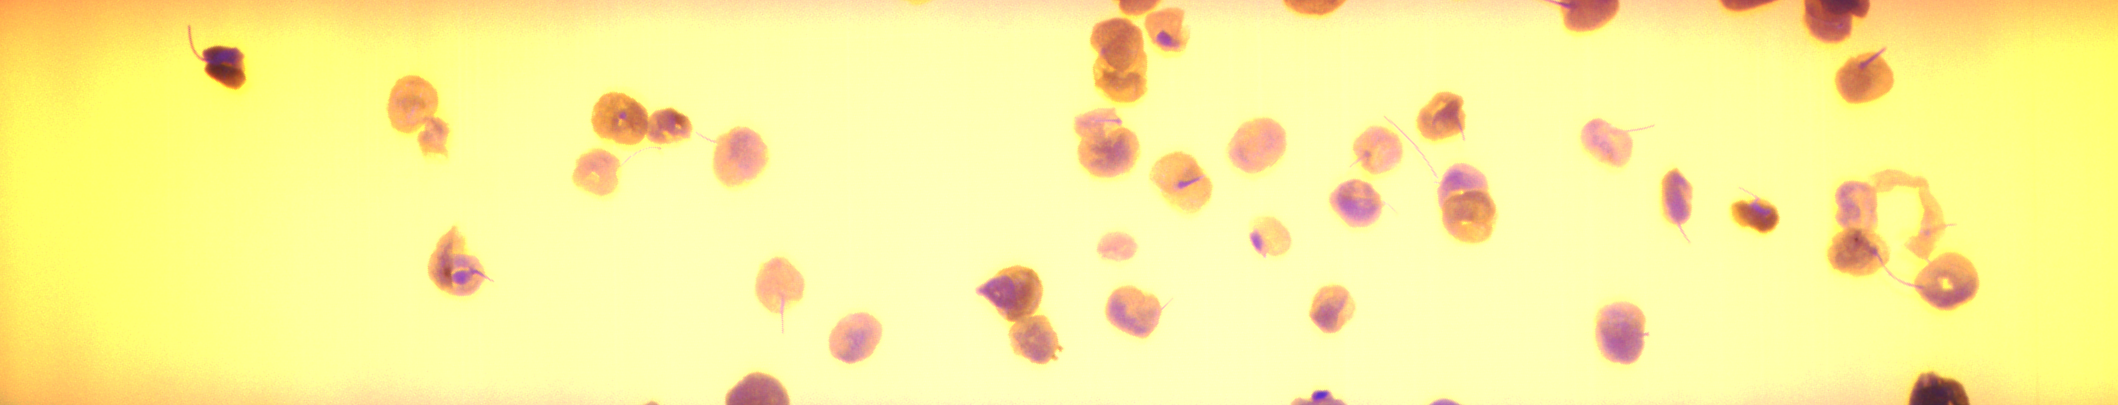

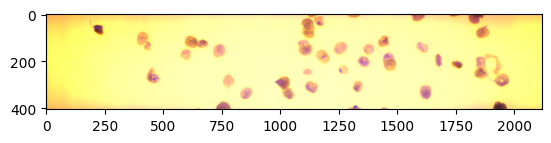

In [156]:
import matplotlib.pyplot as plt

im, tgt = db[0]

plt.imshow(im.permute(1,2,0))
PIL.Image.fromarray(im.permute(1, 2, 0).mul(255).byte().cpu().numpy())

In [157]:
print(im.shape)
print(tgt['boxes'].shape)

torch.Size([3, 405, 2118])
torch.Size([17, 4])


In [158]:
# index = 0
# for i, t in db:
#   if (len(t['masks']) < 2):
#     print(len(t['masks']), index)
#   index = index + 1

In [159]:
# index = 0
# for i, t in db:
#   al = len(t['area'])
#   ml = len(t['boxes'])
#   bl = len(t['masks'])
#   ll = len(t['labels'])

#   if (al == ml and al == bl and al == ll ):
#     pass
#   else :
#     print(index, al, ml, bl, ll)

#   # if (al < 5):
#   #   print(index, al)

#   index = index + 1


In [160]:
import torchvision.transforms.functional as F

def show(imgs):
    if not isinstance(imgs, list):
        imgs = [imgs]
    fix, axs = plt.subplots(ncols=len(imgs), squeeze=False)
    for i, img in enumerate(imgs):
        img = img.detach()
        img = F.to_pil_image(img)
        axs[0, i].imshow(np.asarray(img))
        axs[0, i].set(xticklabels=[], yticklabels=[], xticks=[], yticks=[])

    return img


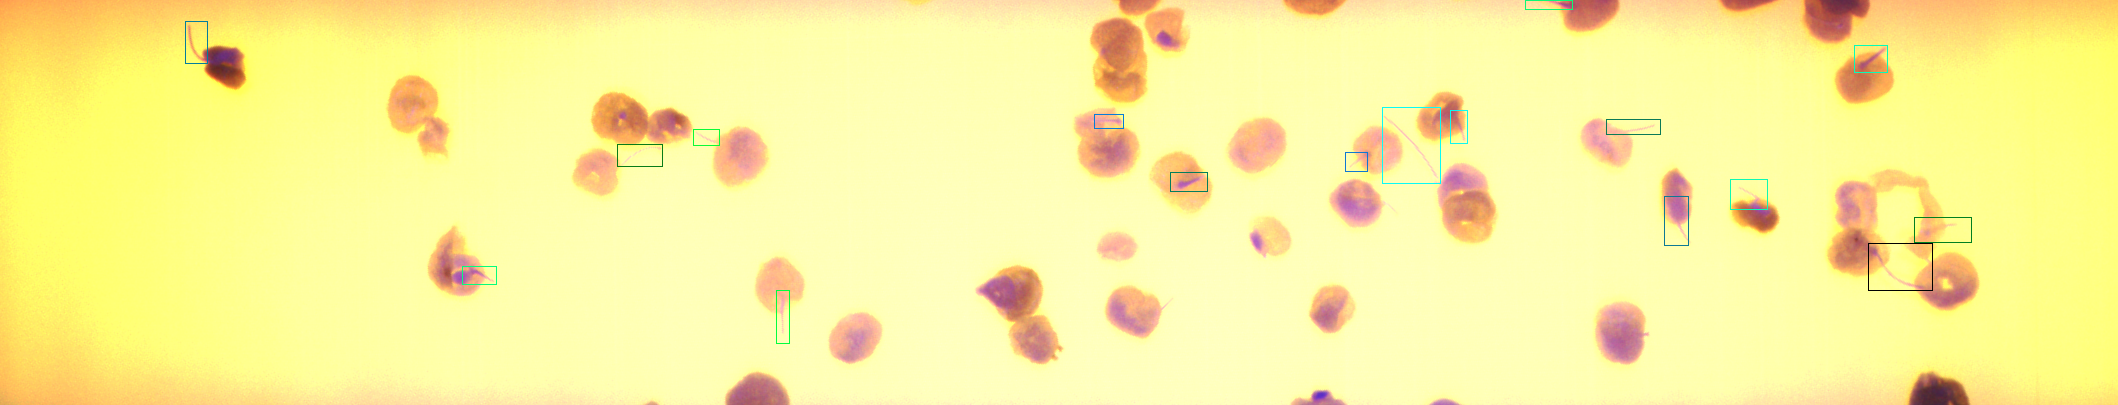

In [161]:
from torchvision.utils import draw_bounding_boxes

# masks_ge050 = masks[scores]

int8_img = (im *255).byte()

cherries_with_all_masks = draw_bounding_boxes(int8_img, boxes=tgt['boxes'])

PIL.Image.fromarray(cherries_with_all_masks.permute(1, 2, 0).byte().cpu().numpy())

In [162]:
db[3]

(tensor([[[1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
          [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
          [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
          ...,
          [0.5961, 0.5843, 0.5490,  ..., 1.0000, 1.0000, 1.0000],
          [0.6157, 0.6196, 0.5804,  ..., 1.0000, 1.0000, 1.0000],
          [0.6510, 0.6549, 0.6078,  ..., 1.0000, 1.0000, 1.0000]],
 
         [[0.7020, 0.7059, 0.6980,  ..., 0.7686, 0.7529, 0.7804],
          [0.7137, 0.7176, 0.7137,  ..., 0.8118, 0.7843, 0.8000],
          [0.7176, 0.7176, 0.7255,  ..., 0.7922, 0.7765, 0.7922],
          ...,
          [0.3020, 0.3020, 0.2824,  ..., 0.9216, 0.9216, 0.9294],
          [0.3373, 0.3529, 0.3294,  ..., 0.8941, 0.9137, 0.9451],
          [0.3725, 0.3843, 0.3608,  ..., 0.9059, 0.8902, 0.9020]],
 
         [[0.4275, 0.4196, 0.4275,  ..., 0.4000, 0.3961, 0.3843],
          [0.4275, 0.4196, 0.4196,  ..., 0.4078, 0.4000, 0.3882],
          [0.4275, 0.4235, 0.4235,  ...,

change failimport with _six to 'from torch import inf'

In [163]:
#print(model.backbone.body.layer1[0].conv1.weight.dtype)

In [164]:
%%shell

# Download TorchVision repo to use some files from
# references/detection
git clone https://github.com/pytorch/vision.git
cd vision
# git checkout v0.8.2

cp references/detection/utils.py ../
cp references/detection/transforms.py ../
cp references/detection/coco_eval.py ../
cp references/detection/engine.py ../
cp references/detection/coco_utils.py ../

fatal: destination path 'vision' already exists and is not an empty directory.


In [165]:

from engine import train_one_epoch, evaluate
import utils
# import torchvision.transforms as T

# #print(T.RandomVerticalFlip)

# def get_transform(train):
#     transforms = []

#     def crop800(image):
#       return T.functional(image, 28, 160, 2416, 494)

#     # converts the image, a PIL image, into a PyTorch Tensor
#     transforms.append(T.ToTensor())
#     #transforms.append(transforms.Lambda(crop800),)
#     #if train:
#         # during training, randomly flip the training images
#         # and ground-truth for data augmentation
#         # transforms.append(T.RandomHorizontalFlip(0.5))
#         # transforms.append(T.RandomVerticalFlip(p=0.5))
#         # transforms.append(T.RandomPerspective(distortion_scale=0.6, p=1.0))
#     return T.Compose(transforms)

# trans_global = get_transform(train=True)

In [166]:
from torchvision.models.detection.anchor_utils import AnchorGenerator
from torchvision.models.detection.faster_rcnn import FastRCNNPredictor
# from torchvision.models.detection.mask_rcnn import MaskRCNNPredictor

def get_detection_model(num_classes):
  model = torchvision.models.detection.fasterrcnn_resnet50_fpn_v2(pretrained=True)
  #model = torchvision.models.detection.fasterrcnn_mobilenet_v3_large_fpn(pretrained=True)
  in_features = model.roi_heads.box_predictor.cls_score.in_features
  model.roi_heads.box_predictor = FastRCNNPredictor(in_features, num_classes)

  return model

def get_instance_segmentation_model(num_classes):
        cherry_anchor_sizes = ((8,), (16,), (32,), (64,) )
        cherry_apect_ratios = ((0.666, 1.0, 1.333),) * len(cherry_anchor_sizes)
        cherry_rpn = AnchorGenerator(cherry_anchor_sizes, cherry_apect_ratios)

    # load an instance segmentation model pre-trained on COCO
        model = torchvision.models.detection.maskrcnn_resnet50_fpn(

            pretrained=False,
            num_classes=1,

            # base class MaskR-CNN parameters
            # transform parameters
            min_size=250,
            max_size=1232,
            image_mean=None,
            image_std=None,
            # RPN parameters
            rpn_anchor_generator=None,
            rpn_head=None,
            rpn_pre_nms_top_n_train=20000,
            rpn_pre_nms_top_n_test=10000,
            rpn_post_nms_top_n_train=20000,
            rpn_post_nms_top_n_test=10000,
            rpn_nms_thresh=0.7,
            rpn_fg_iou_thresh=0.7,
            rpn_bg_iou_thresh=0.3,
            rpn_batch_size_per_image=2560,
            rpn_positive_fraction=0.5,
            rpn_score_thresh=0.0,
            # Box parametersasd
            box_roi_pool=None,
            box_head=None,
            box_predictor=None,
            box_score_thresh=0.5,
            box_nms_thresh=0.5,
            box_detections_per_img=1000,
            box_fg_iou_thresh=0.5,
            box_bg_iou_thresh=0.5,
            box_batch_size_per_image=5120,
            box_positive_fraction=0.25,
            bbox_reg_weights=None,
            # Mask parameters
            mask_roi_pool=None,
            mask_head=None,
            mask_predictor=None,

        )

        return model

({'boxes': tensor([[1380.0000,  303.0000, 1449.0000,  333.0000],
        [ 998.0000,  325.0000, 1030.0000,  375.0000],
        [1330.0000,  143.0000, 1352.0000,  166.0000],
        [ 488.0000,  221.0000,  532.0000,  238.0000],
        [ 598.0000,  175.0000,  617.0000,  210.0000],
        [ 893.0000,  316.0000,  918.0000,  364.0000],
        [1140.0000,  329.0000, 1155.0000,  357.0000],
        [ 850.9999,  333.0000,  912.9999,  372.0000],
        [ 881.9999,  345.0000,  912.9999,  365.0000],
        [1569.0000,  202.0000, 1583.0000,  229.0000],
        [ 867.0000,   49.0000,  935.0001,   65.0000],
        [1110.0000,  236.0000, 1158.0000,  289.0000],
        [ 633.0000,   73.0000,  650.9999,  110.0000],
        [ 685.0000,  160.0000,  709.0000,  178.0000],
        [1361.0000,   96.0000, 1431.0000,  124.0000],
        [ 849.0000,  174.0000,  930.0000,  201.0000],
        [1946.0000,    4.0000, 1979.9999,   31.0000],
        [ 585.0000,    0.0000,  603.0000,   15.0000]]), 'labels': tenso

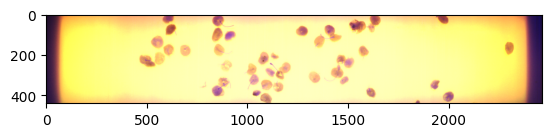

In [167]:
import torchvision

import matplotlib.pyplot as plt


model = get_detection_model(2) #torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=True)
dataset = CherryDataset(data, get_transform(train=False))
data_loader = torch.utils.data.DataLoader(
    dataset, batch_size=10, shuffle=True, num_workers=2,
    collate_fn=utils.collate_fn
)

images,targets = next(iter(data_loader))

#masks = targets[0]['masks']

# mask = masks[0]

plt.imshow(  images[0].permute(1,2,0)  )
#plt.imshow(  mask  )


# images_double = list(image.float() for image in images)

# print(images_double[0].dtype)
#images[0].shape

#print(images[0].shape)
#im_torch = torch.tensor(images)

#print(targets)

#targets = [{k: v for k, v in t.items()} for t in targets]
#print(images)
print(targets)

# print(targets[0]['area'].shape)
output = model(images,targets)   # Returns losses and detections

# For inference
model.eval()
x = [torch.rand(3, 2416, 494), torch.rand(3, 2416, 494)]
predictions = model(x)           # Returns predictions






### Putting everything together

We now have the dataset class, the models and the data transforms. Let's instantiate them

In [168]:
# perform maximum augmentations and remove any images with no bounding boxes in them

# dataset.tfs = get_transform(train=False)
# ind = []
# for index, data in enumerate(dataset):
#   targets = data[1]
#   boxes = targets['boxes']
#   if len(boxes) == 0:
#     ind.append(index)

# if(len(ind) >0):
#   print('remove: ', ind)
#   del dataset[ind]

# del dataset[[402, 431, 435, 767, 772, 780, 981]]

In [169]:
# use our dataset and defined transformations
dataset = CherryDataset(data, get_transform(train=True, rotation=[-5,5], rotation_prob=0.5))
#del dataset[[402, 431, 435, 767, 772, 780, 981]]
dataset_test = CherryDataset(data, get_transform(train=False))
#del dataset_test[[402, 431, 435, 767, 772, 780, 981]]

# split the dataset in train and test set
torch.manual_seed(1)


print(len(dataset))
indices = torch.randperm(len(dataset)).tolist()
indices
dataset = torch.utils.data.Subset(dataset, indices[:-30])
dataset_test = torch.utils.data.Subset(dataset_test, indices[-30:])

print(indices)
print(len(dataset))
print(len(dataset_test))


# define training and validation data loaders
data_loader = torch.utils.data.DataLoader(
    dataset, batch_size=5, shuffle=True, num_workers=2,
    collate_fn=utils.collate_fn)

data_loader_test = torch.utils.data.DataLoader(
    dataset_test, batch_size=5, shuffle=False, num_workers=2,
    collate_fn=utils.collate_fn)

160
[5, 147, 92, 69, 23, 18, 55, 57, 143, 1, 108, 12, 88, 60, 121, 95, 118, 71, 132, 101, 30, 86, 54, 40, 59, 61, 90, 7, 93, 114, 68, 51, 119, 148, 113, 58, 9, 70, 84, 159, 85, 133, 129, 75, 43, 13, 16, 80, 145, 110, 144, 78, 2, 34, 117, 83, 103, 39, 4, 146, 106, 122, 111, 48, 35, 158, 127, 44, 128, 32, 3, 63, 0, 105, 120, 53, 81, 152, 15, 104, 62, 74, 126, 112, 155, 100, 73, 56, 25, 96, 140, 134, 125, 52, 115, 36, 37, 135, 26, 109, 153, 65, 141, 24, 50, 14, 91, 38, 89, 20, 8, 27, 64, 22, 17, 72, 45, 99, 76, 150, 77, 149, 41, 107, 6, 42, 137, 79, 46, 102, 139, 116, 66, 29, 98, 49, 33, 124, 151, 136, 138, 28, 156, 157, 142, 47, 94, 97, 130, 87, 123, 11, 21, 67, 19, 10, 154, 31, 131, 82]
130
30


Now let's instantiate the model and the optimizer

In [170]:
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

# our dataset has two classes only - background and person
num_classes = 2

# get the model using our helper function
model = get_detection_model(num_classes)
# move model to the right device
model.to(device)

# construct an optimizer
params = [p for p in model.parameters() if p.requires_grad]
optimizer = torch.optim.SGD(params, lr=0.005,
                            momentum=0.9, weight_decay=0.0005)

# and a learning rate scheduler which decreases the learning rate by
# 10x every 3 epochs
lr_scheduler = torch.optim.lr_scheduler.StepLR(optimizer,
                                               step_size=3,
                                               gamma=0.1)

And now let's train the model for 10 epochs, evaluating at the end of every epoch.

In [171]:
# let's train it for 10 epochs
from torch.optim.lr_scheduler import StepLR
num_epochs = 10

for epoch in range(num_epochs):
    # train for one epoch, printing every 10 iterations
    train_one_epoch(model, optimizer, data_loader, device, epoch, print_freq=10)
    # update the learning rate
    lr_scheduler.step()
    # evaluate on the test dataset
    #evaluate(model, data_loader_test, device=device)

Epoch: [0]  [ 0/26]  eta: 0:00:25  lr: 0.000205  loss: 3.8645 (3.8645)  loss_classifier: 0.6901 (0.6901)  loss_box_reg: 0.1535 (0.1535)  loss_objectness: 2.2803 (2.2803)  loss_rpn_box_reg: 0.7405 (0.7405)  time: 0.9830  data: 0.4833  max mem: 7783
Epoch: [0]  [10/26]  eta: 0:00:09  lr: 0.002203  loss: 1.8630 (2.6517)  loss_classifier: 0.5197 (0.5344)  loss_box_reg: 0.2260 (0.2613)  loss_objectness: 0.6597 (1.3054)  loss_rpn_box_reg: 0.4805 (0.5507)  time: 0.5666  data: 0.0594  max mem: 7783
Epoch: [0]  [20/26]  eta: 0:00:03  lr: 0.004201  loss: 1.5888 (2.0828)  loss_classifier: 0.4478 (0.4541)  loss_box_reg: 0.4031 (0.3925)  loss_objectness: 0.2676 (0.8097)  loss_rpn_box_reg: 0.3711 (0.4265)  time: 0.5136  data: 0.0175  max mem: 7783
Epoch: [0]  [25/26]  eta: 0:00:00  lr: 0.005000  loss: 1.4430 (1.9259)  loss_classifier: 0.3066 (0.4112)  loss_box_reg: 0.4850 (0.4356)  loss_objectness: 0.2457 (0.6903)  loss_rpn_box_reg: 0.2727 (0.3889)  time: 0.5035  data: 0.0173  max mem: 7783
Epoch: [

In [172]:
# 50

from google.colab import drive
drive.mount('/gdrive')

path =  'stem_model.pt'

torch.save(model.state_dict(), path)

# # # Create & upload a text file.
# # uploaded = drive.CreateFile({'segmentation_model': path})
# # uploaded.SetContentFile(path)
# # uploaded.Upload()
# # print('Uploaded file with ID {}'.format(uploaded.get('id')))


!cp stem_model.pt "/gdrive/My Drive/stem_model_v1.pt"

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


Now that training has finished, let's have a look at what it actually predicts in a test image

In [173]:
this_len = 100
this_im = None
this_target = None
print(len(dataset_test))
for i in range(0,len(dataset_test)):

  this_im, _ = dataset_test[i]
  boxes = _['boxes']
  print(i, boxes.shape)

  if len(boxes) > 100:
    this_im = im
    this_target = target

30
0 torch.Size([20, 4])
1 torch.Size([22, 4])
2 torch.Size([17, 4])
3 torch.Size([38, 4])
4 torch.Size([40, 4])
5 torch.Size([29, 4])
6 torch.Size([23, 4])
7 torch.Size([22, 4])
8 torch.Size([15, 4])
9 torch.Size([23, 4])
10 torch.Size([27, 4])
11 torch.Size([29, 4])
12 torch.Size([21, 4])
13 torch.Size([22, 4])
14 torch.Size([23, 4])
15 torch.Size([24, 4])
16 torch.Size([51, 4])
17 torch.Size([43, 4])
18 torch.Size([16, 4])
19 torch.Size([45, 4])
20 torch.Size([18, 4])
21 torch.Size([28, 4])
22 torch.Size([35, 4])
23 torch.Size([15, 4])
24 torch.Size([22, 4])
25 torch.Size([11, 4])
26 torch.Size([12, 4])
27 torch.Size([26, 4])
28 torch.Size([22, 4])
29 torch.Size([32, 4])


In [174]:
# # pick one image from the test set
# this_im, _ = dataset_test[3]

im_pil = PIL.Image.open('/gdrive/MyDrive/traina/stems/color/stem_1727136952.png', )
im_pil = im_pil.convert('RGB')
this_im = torchvision.transforms.functional.to_tensor(im_pil)
print(this_im.shape)
#this_im = this_im.permute(1,2,0)
#this_im.unsqueeze_(0)


# put the model in evaluation mode
model.eval()
with torch.no_grad():
    prediction = model([this_im.to(device)])

torch.Size([3, 500, 2464])


Printing the prediction shows that we have a list of dictionaries. Each element of the list corresponds to a different image. As we have a single image, there is a single dictionary in the list.
The dictionary contains the predictions for the image we passed. In this case, we can see that it contains `boxes`, `labels`, `masks` and `scores` as fields.

In [175]:
print(len(prediction[0]['boxes']))

prediction

40


[{'boxes': tensor([[2032.7860,  392.8927, 2063.7954,  449.2385],
          [1188.3438,  322.8742, 1233.3564,  358.4579],
          [ 642.5300,  136.2181,  702.8586,  158.2245],
          [ 493.2092,  170.7153,  532.4760,  215.7081],
          [1875.9132,   53.9633, 1896.4529,  104.1868],
          [1174.1344,   24.3824, 1216.7191,   50.3152],
          [1704.1284,  393.0776, 1727.5808,  424.3751],
          [1415.3745,  416.4773, 1447.9675,  473.2946],
          [1881.7443,  167.7835, 1925.2000,  202.3989],
          [ 767.8805,   71.5481,  786.0394,  100.9560],
          [ 755.7283,  345.3901,  793.1219,  363.9546],
          [1418.6577,  285.9210, 1448.3755,  300.5275],
          [1054.7216,  233.3595, 1077.5410,  257.6528],
          [ 425.6069,  213.9923,  447.4138,  258.9686],
          [ 903.2842,  223.3203,  928.9854,  244.6699],
          [1045.6638,  136.6445, 1060.9324,  164.9223],
          [ 469.4255,  331.2372,  487.8384,  359.4515],
          [ 993.0773,  212.7619, 1026.3

Let's inspect the image and the predicted segmentation masks.

For that, we need to convert the image, which has been rescaled to 0-1 and had the channels flipped so that we have it in `[C, H, W]` format.

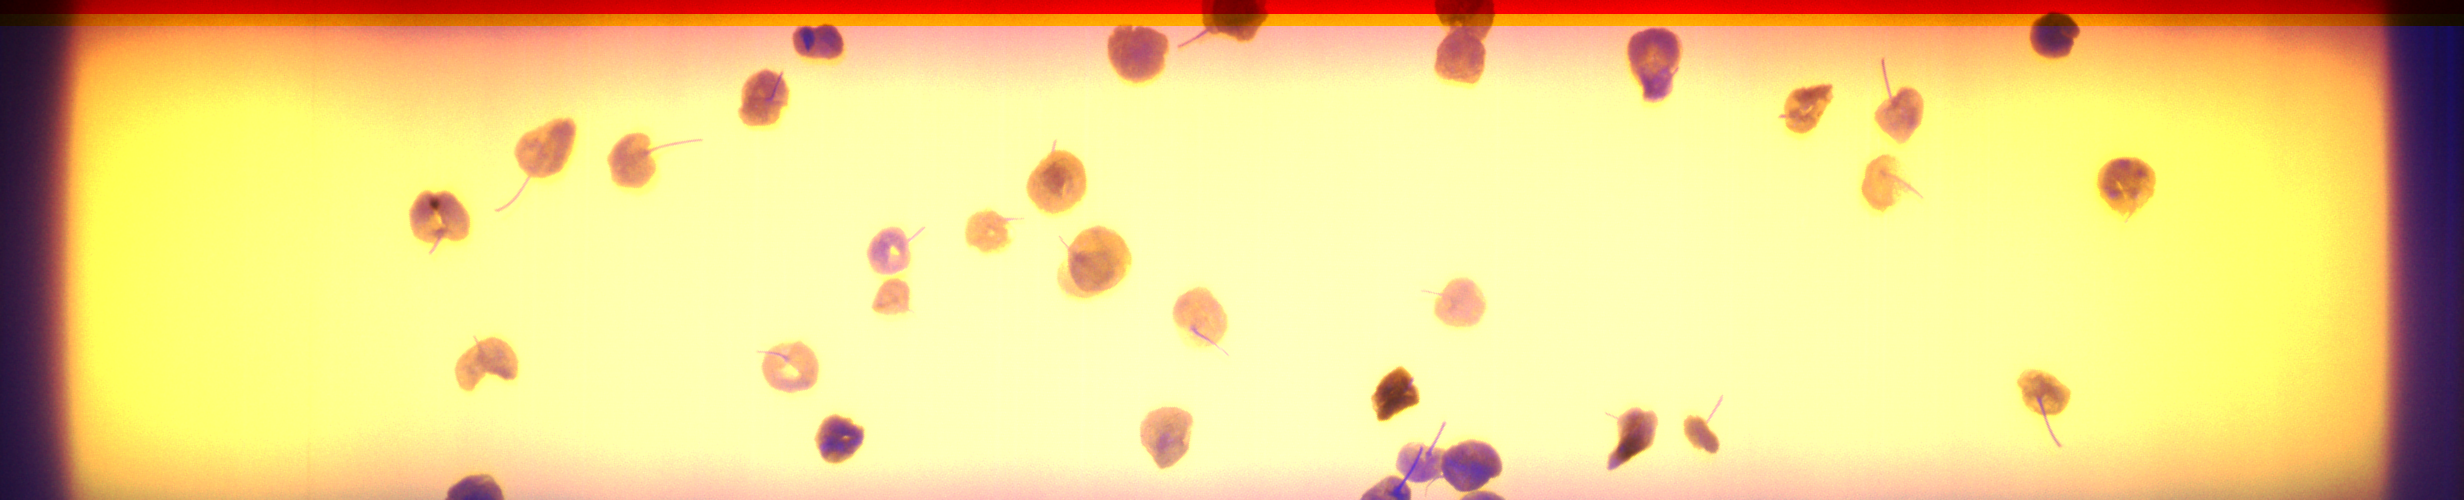

In [176]:

PIL.Image.fromarray(this_im.mul(255).permute(1, 2, 0).byte().numpy())

And let's now visualize the top predicted segmentation mask. The masks are predicted as `[N, 1, H, W]`, where `N` is the number of predictions, and are probability maps between 0-1.

In [177]:
import torchvision.transforms.functional as F

def show(imgs):
    if not isinstance(imgs, list):
        imgs = [imgs]
    fix, axs = plt.subplots(ncols=len(imgs), squeeze=False)
    for i, img in enumerate(imgs):
        img = img.detach()
        img = F.to_pil_image(img)
        axs[0, i].imshow(np.asarray(img))
        axs[0, i].set(xticklabels=[], yticklabels=[], xticks=[], yticks=[])

    return img



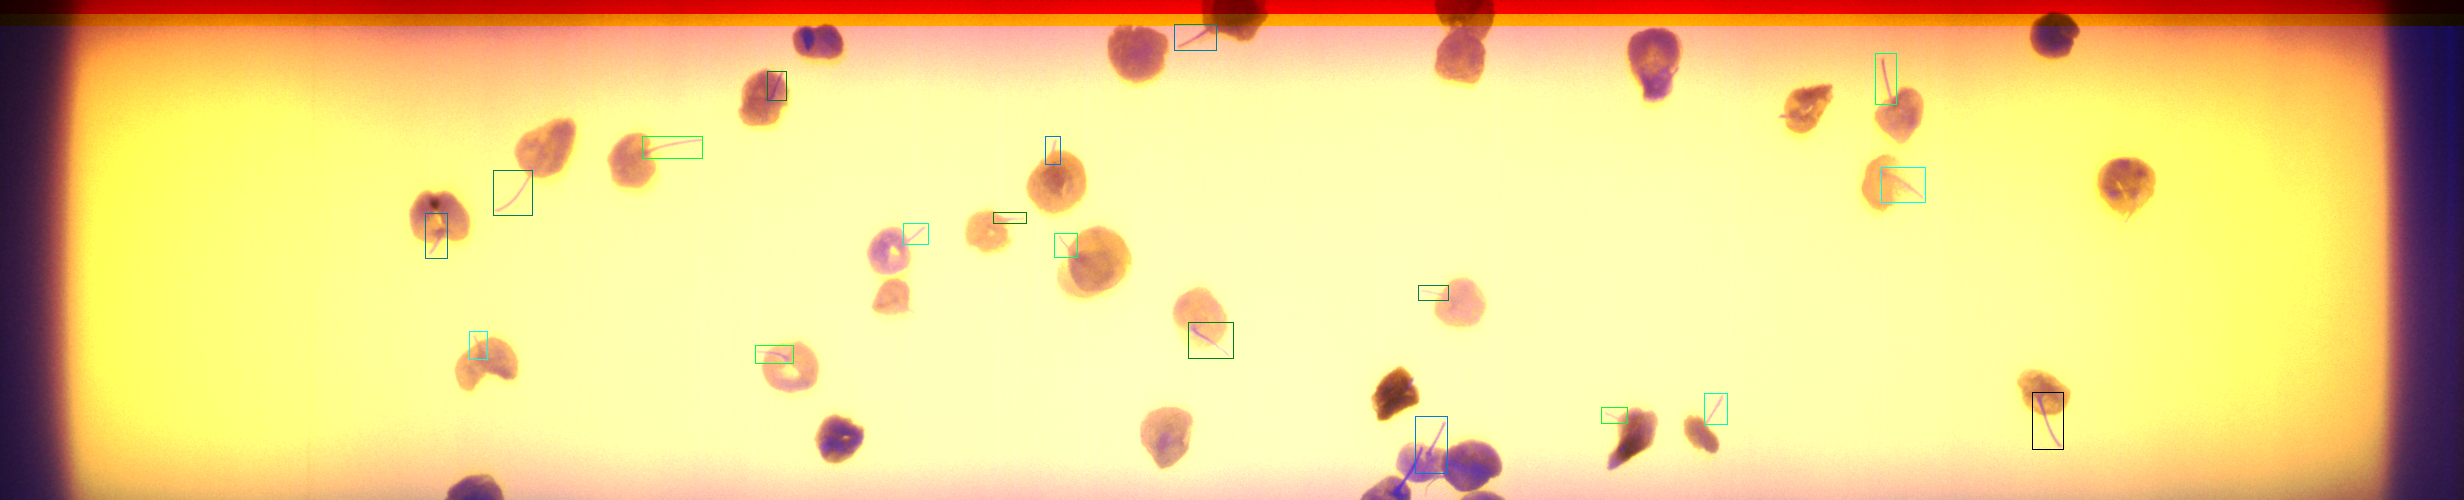

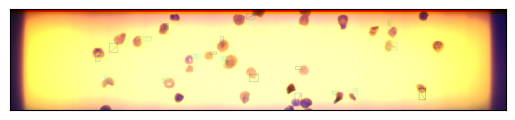

In [178]:
from torchvision.utils import draw_bounding_boxes

scores = prediction[0]['scores'].ge(0.75)
boxes = prediction[0]['boxes'][scores]
labels = prediction[0]['labels'][scores]
# masks = prediction[0]['masks'].ge(0.25)

# masks_ge050 = masks[scores]

int8_img = (this_im *255).byte()

cherries_with_all_masks = draw_bounding_boxes(int8_img, boxes=boxes)

img_color_masks = show(cherries_with_all_masks)

img_color_masks

In [179]:
client = make_client(host="app.cvat.ai", credentials=('whavener', 'LabelDoo1'))

In [180]:
task = client.tasks.retrieve(936913)

In [181]:
frame_info = task.get_frames_info()

print(len(frame_info))

40


In [182]:


from typing import List
import PIL.Image

import torchvision.models

from cvat_sdk import make_client
import cvat_sdk.models as models
import cvat_sdk.auto_annotation as cvataa

In [183]:
class TorchvisionDetectionFunction:
    def __init__(self, model, transforms, box_score_thresh) -> None:
        # load the ML model
        # weights_enum = torchvision.models.get_model_weights(model_name)
        # self._weights = weights_enum[weights_name]
        self._score_thresh = box_score_thresh
        self._transforms = transforms
        self._model = model
        self._model.eval()

    @property
    def spec(self) -> cvataa.DetectionFunctionSpec:
        # describe the annotations
        return cvataa.DetectionFunctionSpec(
            labels=[
                cvataa.label_spec('stem', 1)
            ]
        )

    def detect(self, context, image: PIL.Image.Image) -> List[models.LabeledShapeRequest]:
        # convert the input into a form the model can understand
        transformed_image = [self._transforms(image)]

        # run the ML model
        results = self._model(transformed_image)

        for r in results:
          scores = r['scores'].ge(self._score_thresh)
          r['boxes'] = r['boxes'][scores]
          r['labels'] = r['labels'][scores]

        # convert the results into a form CVAT can understand
        return [
            cvataa.rectangle(label.item(), [x.item() for x in box])
            for result in results
            for box, label in zip(result['boxes'], result['labels'])
        ]



In [184]:
simple_tf = torchvision.transforms.Compose([
    torchvision.transforms.ToTensor()
])


In [185]:
model.to('cpu')

FasterRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
       

In [189]:
# log into the CVAT server
with make_client(host="app.cvat.ai", credentials=('whavener', 'LabelDoo1')) as client:
    # annotate task 12345 using Faster R-CNN
    cvataa.annotate_task(client, 937212,
        TorchvisionDetectionFunction(model, simple_tf, box_score_thresh=0.75),
    )

In [187]:

im_all = torch.zeros(3,500,2464) + 0.25

for i in range(len(prediction[0]['masks'])):
  if (prediction[0]['scores'][i] > 0.5):
    im_all = im_all + prediction[0]['masks'][i].to('cpu') * 0.75


masked = this_im.to('cpu') * im_all

PIL.Image.fromarray(masked.permute(1, 2, 0).mul(255).byte().cpu().numpy())

KeyError: 'masks'

In [ ]:
! cp -r /gdrive/MyDrive/traina/hdr/images hdr

In [ ]:
from os import listdir
from os.path import isdir, join

def process_image_set(mypath):
  onlydirs = [f for f in listdir(mypath) if isdir(join(mypath, f))]
  print(onlydirs)


process_image_set('hdr/natural_clean')